<a href="https://colab.research.google.com/github/AtaAtas/MYZ_307/blob/main/myz_hw1_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from math import sqrt, pi, exp
import os

# import csv file from google drive

''' from google.colab import drive
drive.mount('/content/drive') '''

# random distribution for each execution

distribution_path_random = 'https://raw.githubusercontent.com/AtaAtas/MYZ_307/refs/heads/main/HW_1/distribution.csv'

# fixed distribution

distribution_path_fixed = 'https://raw.githubusercontent.com/AtaAtas/MYZ_307/refs/heads/main/HW_1/distribution_backup.csv'

In [3]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

" \nfrom google.colab import drive\ndrive.mount('/content/drive') \n"

In [4]:
# define arrays and store into a csv file

zero_array = [random.uniform(-2, 2) for i in range(200)]
one_array = [random.uniform(0, 4) for i in range(200)]
zero_array.sort()
one_array.sort()


# b)
one_arr  = np.asarray(one_array)

# c)
zero_arr = np.asarray(zero_array)

# d)
# custom function definition for numpy method alternative
def mean_custom(data):
    return sum(data)/len(data)

def std_custom(data):
    varience = 0
    mean = mean_custom(data)
    for item in data:
        varience += (item - mean)**2
    varience /= (len(data)-1)
    return sqrt(varience)

# get mean and std values via numpy methods
mean_zero_np = np.mean(zero_arr)
std_zero_np  = np.std(zero_arr)

mean_one_np = np.mean(one_arr)
std_one_np  = np.std(one_arr)

# get mean and std values via custom function
mean_zero_custom = mean_custom(zero_arr)
std_zero_custom  = std_custom(zero_arr)

mean_one_custom = mean_custom(one_arr)
std_one_custom  = std_custom(one_arr)

# get gaussian distributions with both mean and std values for comparison
zero_gauss_w_np = (1/(std_zero_np * np.sqrt(2 * np.pi))) * np.exp(-(zero_arr - mean_zero_np)**2 / (2 * std_zero_np**2))
one_gauss_w_np = (1/(std_one_np * np.sqrt(2 * np.pi))) * np.exp(-(one_arr - mean_one_np)**2 / (2 * std_one_np**2))

zero_gauss_custom = (1/(std_zero_custom * np.sqrt(2 * np.pi))) * np.exp(-(zero_arr - mean_zero_custom)**2 / (2 * std_zero_custom**2))
one_gauss_custom = (1/(std_one_custom * np.sqrt(2 * np.pi))) * np.exp(-(one_arr - mean_one_custom)**2 / (2 * std_one_custom**2))

mean_zero_custom_for_csv = [mean_zero_custom]
mean_zero_custom_for_csv.extend(np.zeros(199))
mean_one_custom_for_csv = [mean_one_custom]
mean_one_custom_for_csv.extend(np.ones(199))

mean_zero_np_for_csv = [mean_zero_np]
mean_zero_np_for_csv.extend(np.zeros(199))
mean_one_np_for_csv = [mean_one_np]
mean_one_np_for_csv.extend(np.ones(199))

std_zero_custom_for_csv = [std_zero_custom]
std_zero_custom_for_csv.extend(np.zeros(199))
std_one_custom_for_csv = [std_one_custom]
std_one_custom_for_csv.extend(np.ones(199))

std_zero_np_for_csv = [std_zero_np]
std_zero_np_for_csv.extend(np.zeros(199))
std_one_np_for_csv = [std_one_np]
std_one_np_for_csv.extend(np.ones(199))


# Create a DataFrame with all Gaussian data
df = pd.DataFrame({
    "zero_x": zero_arr,
    "zero_gauss_custom": zero_gauss_custom,
    "mean_zero_custom": mean_zero_custom_for_csv,
    "std_zero_custom": std_zero_custom_for_csv,
    "zero_gauss_numpy": zero_gauss_w_np,
    "mean_zero_np": mean_zero_np_for_csv,
    "std_zero_np": std_zero_np_for_csv,
    "one_x": one_arr,
    "one_gauss_custom": one_gauss_custom,
    "mean_one_custom": mean_one_custom_for_csv,
    "std_one_custom": std_one_custom_for_csv,
    "one_gauss_numpy": one_gauss_w_np,
    "mean_one_np": mean_one_np_for_csv,
    "std_one_np": std_one_np_for_csv
    })

In [5]:
# Export to CSV (new random data created by previous section)
''' df.to_csv(distribution_path_random, index=False) '''

' df.to_csv(distribution_path_random, index=False) '

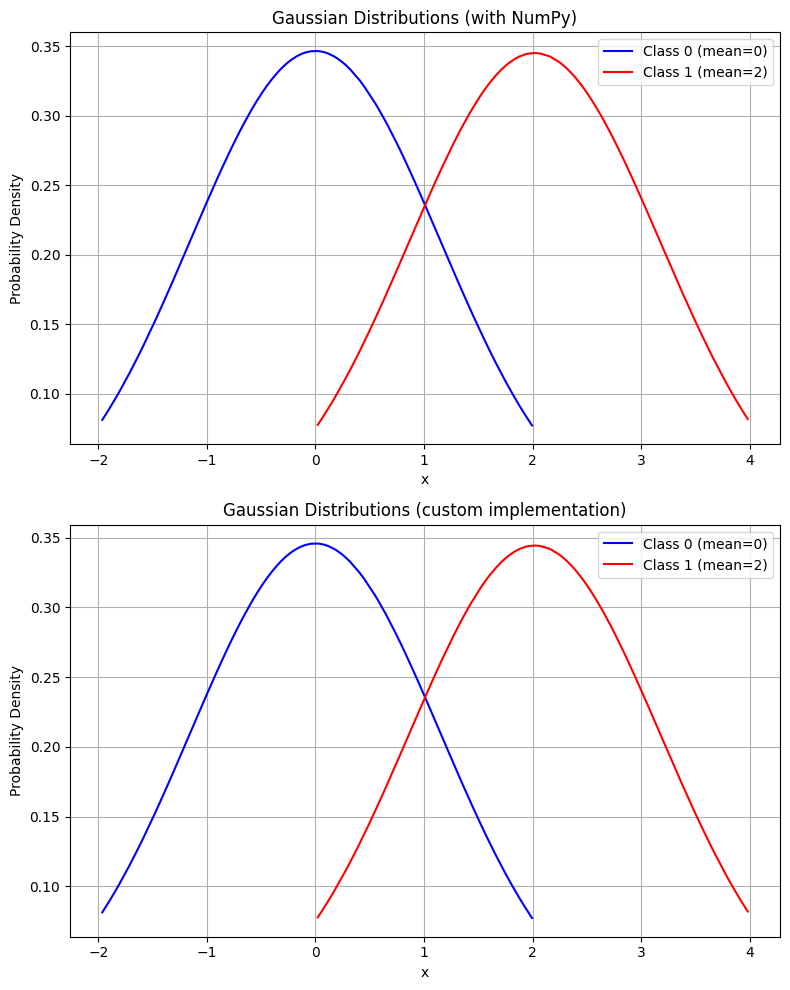

Intersection point is: [[1.00929959]
 [0.23560707]]
Custom Mean 0: -0.0013443261888727
Custom Std 0: 1.1536357658420742
Numpy Mean 0: -0.0013443261888731
Numpy Std 0: 1.150748062274657
Custom Mean 1: 2.018890235798484
Custom Std 1: 1.15849989868109
Numpy Mean 1: 2.0188902357984846
Numpy Std 1: 1.1556000195430405


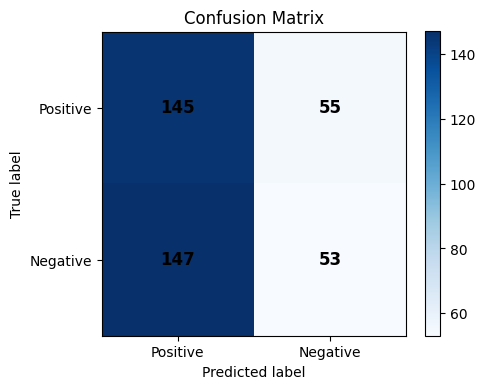

Accuracy: 0.73
Precision: 0.725
Recall: 0.7323232323232324
F1 Score: 0.728643216080402


In [6]:
# Load from CSV (fixed backup data I have created to prevent override of it...
# ...if the user wants to see new random data they can change the file...
# ...path to distribution_path_random inside this function)
df = pd.read_csv(distribution_path_fixed)

# define variables again. I have coded this way to prevent obtaining different...
# ...distributions again and again when running the code. This way when the user...
# ...wants to plot the data, they can just run this section of the code without...
# ...changing the dataset.

zero_arr          = df["zero_x"].dropna().to_numpy()
zero_gauss_w_np   = df["zero_gauss_numpy"].dropna().to_numpy()
mean_zero_np      = df["mean_zero_np"].dropna().to_numpy()[0]
std_zero_np       = df["std_zero_np"].dropna().to_numpy()[0]
zero_gauss_custom = df["zero_gauss_custom"].dropna().to_numpy()
mean_zero_custom  = df["mean_zero_custom"].dropna().to_numpy()[0]
std_zero_custom   = df["std_zero_custom"].dropna().to_numpy()[0]

one_arr           = df["one_x"].dropna().to_numpy()
one_gauss_w_np    = df["one_gauss_numpy"].dropna().to_numpy()
mean_one_np       = df["mean_one_np"].dropna().to_numpy()[0]
std_one_np        = df["std_one_np"].dropna().to_numpy()[0]
one_gauss_custom  = df["one_gauss_custom"].dropna().to_numpy()
mean_one_custom   = df["mean_one_custom"].dropna().to_numpy()[0]
std_one_custom    = df["std_one_custom"].dropna().to_numpy()[0]


''' threshold value obtained from a) '''
threshold_val = 1

''' use subplot '''
fig, axes = plt.subplots(2, 1, figsize=(8, 10))  # 2 rows, 1 column

# --- First subplot ---
axes[0].plot(zero_arr, zero_gauss_w_np, color='blue', label='Class 0 (mean=0)')
axes[0].plot(one_arr, one_gauss_w_np, color='red',  label='Class 1 (mean=2)')
axes[0].set_title("Gaussian Distributions (with NumPy)")
axes[0].set_xlabel("x")
axes[0].set_ylabel("Probability Density")
axes[0].legend()
axes[0].grid(True)

# --- Second subplot ---
axes[1].plot(zero_arr, zero_gauss_custom, color='blue', label='Class 0 (mean=0)')
axes[1].plot(one_arr, one_gauss_custom, color='red',  label='Class 1 (mean=2)')
axes[1].set_title("Gaussian Distributions (custom implementation)")
axes[1].set_xlabel("x")
axes[1].set_ylabel("Probability Density")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()  # avoid overlap between subplots
plt.show()

''' intersection point calculation '''
zero_custom_list = np.array([[zero_arr],[zero_gauss_custom]])
one_custom_list = np.array([[one_arr],[one_gauss_custom]])

epsilon = 0.01
intersection= []
for i in range(len(zero_custom_list[0][0])):
  for j in range(len(one_custom_list[0][0])):
    if (abs((zero_custom_list[0][0][i] - one_custom_list[0][0][j]))<=epsilon and abs((zero_custom_list[1][0][i] - one_custom_list[1][0][j]))<= epsilon):
      intersection.append(np.array([[zero_custom_list[0][0][i]], [zero_custom_list[1][0][i]]]))
      inter = intersection[len(intersection)//2]
      break

print(f"Intersection point is: {inter}")
print(f"Custom Mean 0: {mean_zero_custom}")
print(f"Custom Std 0: {std_zero_custom}")
print(f"Numpy Mean 0: {mean_zero_np}")
print(f"Numpy Std 0: {std_zero_np}")
print(f"Custom Mean 1: {mean_one_custom}")
print(f"Custom Std 1: {std_one_custom}")
print(f"Numpy Mean 1: {mean_one_np}")
print(f"Numpy Std 1: {std_one_np}")

# g)
tn = 0
fn = 0
tp = 0
fp = 0
for c in range(len(zero_gauss_custom)):
  if (zero_arr[c]<threshold_val):
    tn += 1
  else:
    fn += 1
for c in range(len(one_gauss_custom)):
  if (one_arr[c]>threshold_val):
    tp += 1
  else:
    fp += 1

cm = np.array([[tp,fp],
               [tn, fn]])


fig, ax = plt.subplots(figsize=(5, 4))
im = ax.imshow(cm, cmap='Blues')

# Add labels
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")

# Axis tick labels
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Positive', 'Negative'])
ax.set_yticklabels(['Positive', 'Negative'])

# Annotate each cell with its value
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j],
                ha='center', va='center', color='black', fontsize=12, fontweight='bold')

# Add colorbar + gridlines
plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

# h)
# Accuracy, Precision, Recall, F1 score calculation
accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")